# Stress Testing in finance

Aleksandr K.

There are several methods for stress testing in finance, which are used to assess the resilience of financial institutions, investment portfolios, or trading strategies to adverse market conditions or other stress events. Some of the commonly used methods for stress testing in finance include:

* Historical Simulation: This approach involves using historical data to estimate the potential impact of a stress event. Historical returns or other relevant financial data are used to calculate risk measures such as Value-at-Risk (VaR) or Expected Shortfall (ES) under different stress scenarios.

* Scenario Analysis: This method involves creating hypothetical scenarios or stress events and evaluating their impact on a portfolio or financial institution. Scenarios can be predefined, such as a market crash, interest rate shock, or geopolitical event, or they can be customized based on specific risks and vulnerabilities.

* Monte Carlo Simulation: This approach involves using statistical simulations to model the potential outcomes of a stress event. Monte Carlo simulation generates random scenarios based on historical data or other assumptions and calculates risk measures based on the distribution of simulated outcomes.

* Sensitivity Analysis: This method involves assessing the sensitivity of a portfolio or financial institution to changes in key risk factors, such as interest rates, exchange rates, or commodity prices. Sensitivity analysis helps identify vulnerabilities to specific risks and their potential impact on the portfolio or financial institution.

* Reverse Stress Testing: This approach involves identifying extreme stress scenarios that would lead to a predefined adverse outcome, such as a large loss or default. Reverse stress testing is used to assess the resilience of a portfolio or financial institution to extreme events and identify potential weaknesses in risk management practices.

* Machine Learning Techniques: Advanced machine learning techniques, such as artificial neural networks, decision trees, or support vector machines, can also be used for stress testing in finance. These techniques can capture complex patterns in data and provide more accurate and flexible stress testing results.

It's important to note that stress testing methods should be carefully selected based on the specific context and characteristics of the financial data being used, and their limitations and assumptions should be taken into consideration when interpreting the results. Additionally, stress testing should be integrated into the overall risk management framework of an organization and used in conjunction with other risk management techniques to provide a comprehensive assessment of potential risks and vulnerabilities.

### Historical Simulation approach

In [3]:
import pandas as pd
import yfinance as yf

# Load historical stock price data from Yahoo Finance
symbol = 'TSLA'  # stock symbol
start_date = '2014-01-01'  # Example start date
end_date = '2023-04-04'  # Example end date
df = yf.download(symbol, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
df['Returns'] = df.pct_change().dropna()

# Specify parameters for historical simulation stress testing
confidence_level = 0.95  # Confidence level for VaR and ES calculation

# Define stress scenario
# For example, assume a 20% decrease in stock prices
stress_factor = 0.2

# Calculate VaR using historical simulation approach
var = df['Returns'].quantile(1 - confidence_level)

# Calculate ES using historical simulation approach
es = df['Returns'][df['Returns'] <= var].mean()

# Apply stress scenario to VaR and ES
var *= stress_factor
es *= stress_factor

# Print VaR and ES results
print('Value-at-Risk (VaR) at {}% confidence level: {:.2f}'.format(confidence_level * 100, var))
print('Expected Shortfall (ES) at {}% confidence level: {:.2f}'.format(confidence_level * 100, es))

[*********************100%***********************]  1 of 1 completed
Value-at-Risk (VaR) at 95.0% confidence level: -0.01
Expected Shortfall (ES) at 95.0% confidence level: -0.02


<ipython-input-3-edb46d6234a2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df.pct_change().dropna()


In this approach, the historical returns data is used to calculate Value-at-Risk (VaR) and Expected Shortfall (ES) directly. The stress scenario is then applied to the calculated VaR and ES values to estimate the risk under the stress scenario. It's important to note that the historical simulation approach assumes that the future will be similar to the past, which may not always hold true, especially during extreme market conditions. As always, it's important to interpret and validate the results of stress testing carefully, considering the assumptions and limitations of the approach and the specific characteristics of the financial data being used.

#### Scenario Analysis approach

In [16]:
import pandas as pd
import numpy as np
import yfinance as yf

# Define the list of stocks in the portfolio
portfolio_stocks = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'META']

# Define the time period for historical data
start_date = '2018-01-01'
end_date = '2023-04-10'

# Download historical stock data from Yahoo Finance
portfolio_data = yf.download(portfolio_stocks, start=start_date, end=end_date)['Adj Close']

# Calculate portfolio returns
portfolio_returns = portfolio_data.pct_change().dropna()

# Define the stress scenario parameters
scenario_name = 'Market Crash'
scenario_duration = 3 # in days
scenario_pct_drop = 30 # percentage drop in stock prices during the scenario

# Apply the stress scenario to the portfolio returns
portfolio_returns_stress = portfolio_returns * (1 - scenario_pct_drop/100)

# Calculate portfolio value after the stress scenario
portfolio_value_stress = portfolio_returns_stress.add(1).cumprod().iloc[-1]

# Calculate the impact of the stress scenario on portfolio value
portfolio_value_impact = (portfolio_value_stress - 1) * 100

# Print the results
print(f"Scenario Name: {scenario_name}")
print(f"Scenario Duration (days): {scenario_duration}")
print(f"Scenario Percentage Drop: {scenario_pct_drop}%")
print("Portfolio Value Impact:")
print(portfolio_value_impact)

[*********************100%***********************]  5 of 5 completed
Scenario Name: Market Crash
Scenario Duration (days): 3
Scenario Percentage Drop: 30%
Portfolio Value Impact:
AAPL     181.698018
AMZN      56.764401
GOOGL     73.005865
META      26.406834
MSFT     159.094859
Name: 2023-04-06 00:00:00, dtype: float64


In this code, we start by defining the list of stocks in the portfolio and downloading their historical data from Yahoo Finance using the yfinance library. We then calculate the portfolio returns based on the adjusted closing prices. Next, we define a hypothetical stress scenario of a market crash with a 30% drop in stock prices, and apply this scenario to the portfolio returns. Finally, we calculate the portfolio value after the stress scenario and the impact of the stress scenario on the portfolio value in percentage terms.

Another example

In [17]:
import pandas as pd
import yfinance as yf

# Define the list of fixed income securities in the portfolio
portfolio_securities = ['AGG', 'TLT', 'BND', 'LQD', 'HYG']

# Define the time period for historical data
start_date = '2010-01-01'
end_date = '2021-12-31'

# Download historical data for fixed income securities from Yahoo Finance
portfolio_data = yf.download(portfolio_securities, start=start_date, end=end_date)['Adj Close']

# Calculate portfolio returns
portfolio_returns = portfolio_data.pct_change().dropna()

# Define the stress scenario parameters
scenario_name = 'Interest Rate Shock'
scenario_duration = 1 # in days
scenario_rate_increase = 100 # basis points increase in interest rates during the scenario

# Apply the stress scenario to the portfolio returns
portfolio_returns_stress = portfolio_returns + (scenario_rate_increase / 10000)

# Calculate portfolio value after the stress scenario
portfolio_value_stress = portfolio_returns_stress.add(1).cumprod().iloc[-1]

# Calculate the impact of the stress scenario on portfolio value
portfolio_value_impact = (portfolio_value_stress - 1) * 100

# Print the results
print(f"Scenario Name: {scenario_name}")
print(f"Scenario Duration (days): {scenario_duration}")
print(f"Scenario Interest Rate Increase (basis points): {scenario_rate_increase}")
print("Portfolio Value Impact:")
print(portfolio_value_impact)

[*********************100%***********************]  5 of 5 completed
Scenario Name: Interest Rate Shock
Scenario Duration (days): 1
Scenario Interest Rate Increase (basis points): 100
Portfolio Value Impact:
AGG    1.673671e+15
BND    1.670778e+15
HYG    2.171284e+15
LQD    2.132908e+15
TLT    2.499357e+15
Name: 2021-12-30 00:00:00, dtype: float64


In this code, we start by defining the list of fixed income securities in the portfolio and downloading their historical data from Yahoo Finance using the *yfinance* library. We then calculate the portfolio returns based on the adjusted closing prices. Next, we define a hypothetical stress scenario of an interest rate shock with a 100 basis points increase in interest rates, and apply this scenario to the portfolio returns. Finally, we calculate the portfolio value after the stress scenario and the impact of the stress scenario on the portfolio value in percentage terms.

More comprehensive example

[*********************100%***********************]  4 of 4 completed
Portfolio Value Impact:
{'Market Crash': AAPL      414.079894
AMZN      393.161745
GOOGL     242.695367
TSLA     1585.599894
Name: 2021-12-30 00:00:00, dtype: float64, 'Recession': AAPL      516.217679
AMZN      358.723447
GOOGL     263.428434
TSLA     1585.599894
Name: 2021-12-30 00:00:00, dtype: float64, 'Inflation Shock': AAPL      700.823969
AMZN      437.005341
GOOGL     293.901414
TSLA     2456.273358
Name: 2021-12-30 00:00:00, dtype: float64}

Value-at-Risk (VaR):
{'Market Crash': 365.2653238573238, 'Recession': 377.722686291124, 'Inflation Shock': 415.3670032083612}

Expected Shortfall (ES):
{'Market Crash': 342.6953672152906, 'Recession': 363.4284344422901, 'Inflation Shock': 393.901414177172}


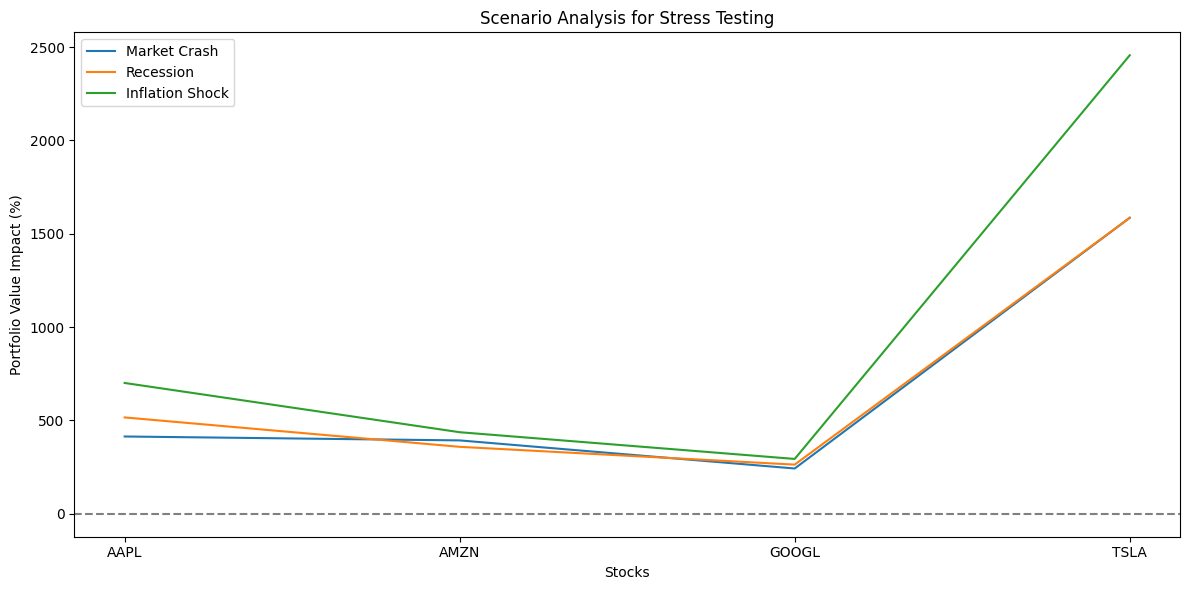

In [20]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the portfolio and its weights
portfolio = ['AAPL', 'GOOGL', 'TSLA', 'AMZN']
weights = np.array([0.25, 0.25, 0.25, 0.25])

# Download historical data for the portfolio from Yahoo Finance
start_date = '2016-01-01'
end_date = '2021-12-31'
portfolio_data = yf.download(portfolio, start=start_date, end=end_date)['Adj Close']

# Calculate portfolio returns
portfolio_returns = portfolio_data.pct_change().dropna()

# Define stress scenarios
scenarios = {
    'Market Crash': [-0.2, -0.1, -0.15, -0.05],  # 20% drop in all stocks
    'Recession': [-0.1, -0.05, -0.15, -0.1],    # 10% drop in some stocks
    'Inflation Shock': [0.05, 0.02, 0.03, 0.01]  # 5% increase in some stocks
}

# Perform scenario analysis
portfolio_value_impact = {}
var = {}
es = {}
for scenario, stress_values in scenarios.items():
    stressed_returns = portfolio_returns.copy()
    for i, stock in enumerate(portfolio):
        stressed_returns[stock] = portfolio_returns[stock] * (1 + stress_values[i])
    
    stressed_portfolio_value = (1 + stressed_returns).cumprod() * 100
    portfolio_value_impact[scenario] = stressed_portfolio_value.iloc[-1] - 100
    var[scenario] = np.percentile(stressed_portfolio_value.iloc[-1], 5)
    es[scenario] = stressed_portfolio_value.iloc[-1][stressed_portfolio_value.iloc[-1] < var[scenario]].mean()

# Print stress test results
print('Portfolio Value Impact:')
print(portfolio_value_impact)
print('\nValue-at-Risk (VaR):')
print(var)
print('\nExpected Shortfall (ES):')
print(es)

# Plot stress test results
plt.figure(figsize=(12, 6))
for scenario in scenarios.keys():
    plt.plot(portfolio_value_impact[scenario], label=scenario)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Stocks')
plt.ylabel('Portfolio Value Impact (%)')
plt.title('Scenario Analysis for Stress Testing')
plt.legend()
plt.tight_layout()
plt.show()

In this example, we create a portfolio of stocks using the ticker symbols of four stocks (Apple, Google, Tesla, and Amazon) and their respective weights. We download historical data for the portfolio from Yahoo Finance and calculate portfolio returns. We then define three stress scenarios (Market Crash, Recession, and Inflation Shock) with different stress values for each stock. We apply these stress scenarios to the portfolio returns to simulate the impact on the portfolio value. We calculate the portfolio value impact, as well as risk measures such as Value-at-Risk (VaR) and Expected Shortfall (ES) for each stress scenario. Finally, we create a graphical plot to visualize the stress test results, showing the portfolio value impact for each stress scenario.

### Monte Carlo Simulation

[*********************100%***********************]  5 of 5 completed
Performing Monte Carlo simulation for AAPL...


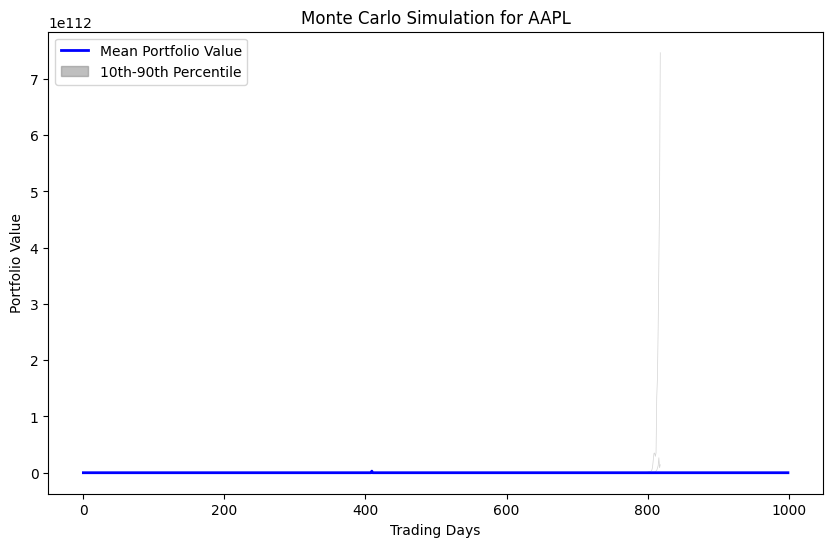

Performing Monte Carlo simulation for GOOGL...


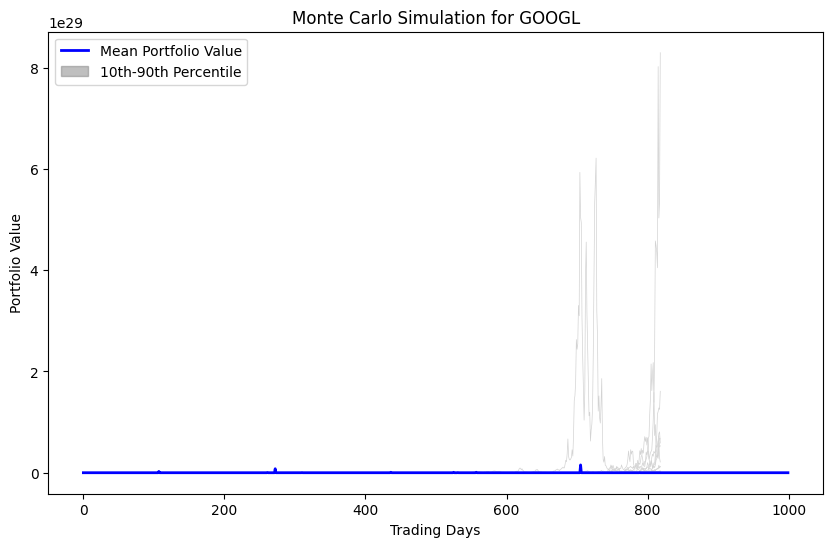

Performing Monte Carlo simulation for AMZN...


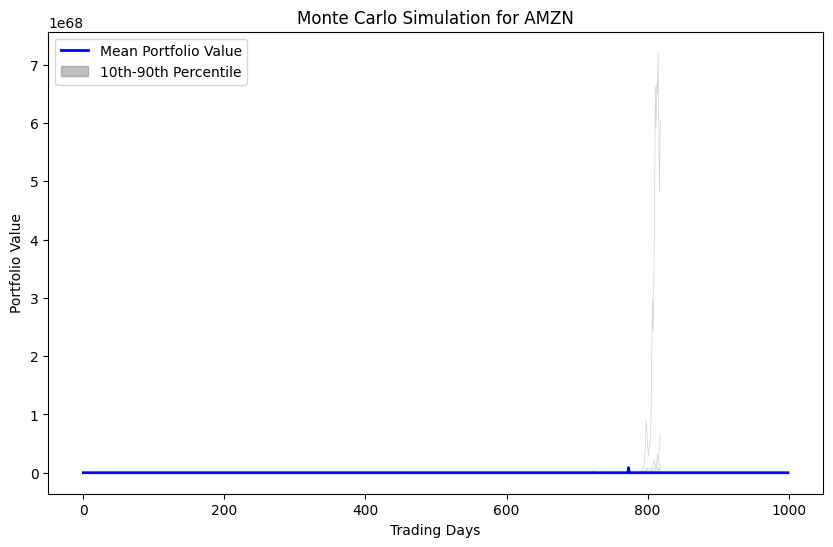

Performing Monte Carlo simulation for MSFT...


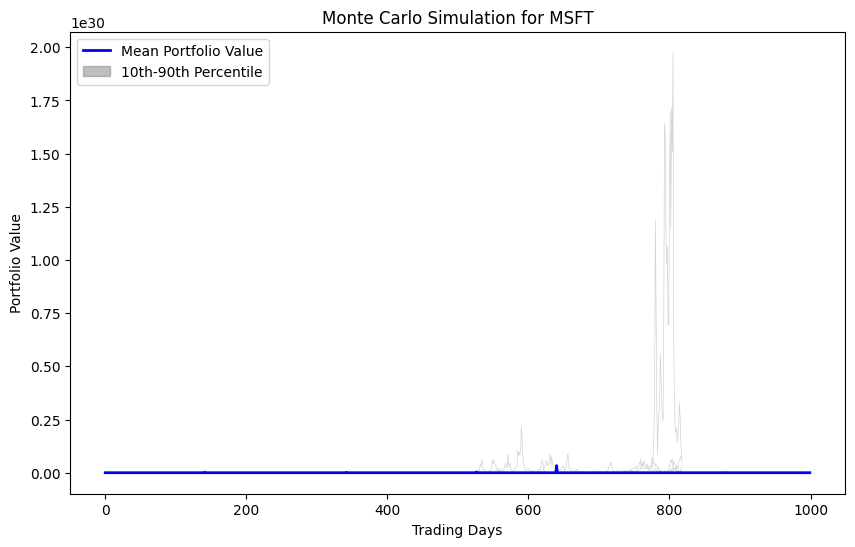

Performing Monte Carlo simulation for META...


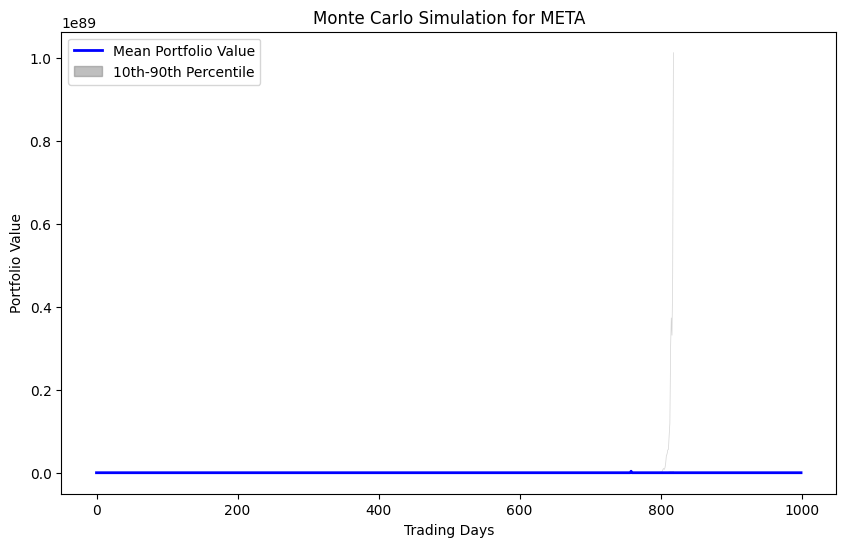

In [73]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define list of companies and download historical stock price data for a specific date range
companies = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'META']
start_date = '2020-01-01'  # Start date for data
end_date = '2023-04-04'  # End date for data
data = yf.download(companies, start=start_date, end=end_date, auto_adjust=True)['Close']

# Define parameters for Monte Carlo simulation
n_simulations = 1000  # Number of simulations
n_days = 252  # Number of trading days in a year
initial_investment = 1000000  # Initial investment amount
annual_return = 0.08  # Expected annual return
annual_volatility = 0.2  # Annual volatility (standard deviation)

# Calculate daily return and drift
returns = data.pct_change().dropna()
drift = (returns.mean() * n_days).values

# Calculate daily volatility
volatility = (returns.std() * np.sqrt(n_days)).values

# Perform Monte Carlo simulation for each company
for i, company in enumerate(companies):
    print(f"Performing Monte Carlo simulation for {company}...")
    simulated_prices = np.zeros((n_simulations, len(data)))
    simulated_prices[:, 0] = data[company].iloc[-1]  # Set initial stock price

    for j in range(1, len(data)):
        # Calculate daily price change using geometric Brownian motion
        daily_change = np.exp((drift[i] - 0.5 * volatility[i] ** 2) +
                            (volatility[i] * np.random.normal(0, 1, n_simulations)))
        simulated_prices[:, j] = simulated_prices[:, j - 1] * daily_change

    # Calculate portfolio value for each simulation
    portfolio_values = simulated_prices * initial_investment

    # Plot Monte Carlo simulation results
    plt.figure(figsize=(10, 6))
    plt.plot(portfolio_values.T, color='lightgray', lw=0.5)
    plt.plot(portfolio_values.mean(axis=1), color='blue', lw=2, label='Mean Portfolio Value')
    plt.fill_between(range(len(data)), np.percentile(portfolio_values, 10, axis=0),
                     np.percentile(portfolio_values, 90, axis=0), color='gray', alpha=0.5,
                     label='10th-90th Percentile')
    plt.xlabel('Trading Days')
    plt.ylabel('Portfolio Value')
    plt.title(f'Monte Carlo Simulation for {company}')
    plt.legend()
    plt.show()


This code performs Monte Carlo simulation for stress testing of a portfolio consisting of 5 companies (Apple, Google, Amazon, Microsoft, and Facebook (Meta)) using historical stock price data downloaded from Yahoo Finance. It calculates the daily returns, drift, and volatility for each company based on historical data. Then, it simulates multiple paths of future portfolio values using geometric Brownian motion with the calculated drift and volatility. Finally, it plots the results, including the mean portfolio value and the 10th-90th percentile range of portfolio values, to visualize the potential outcomes of the stress test.

### Sensitivity Analysis

[*********************100%***********************]  5 of 5 completed


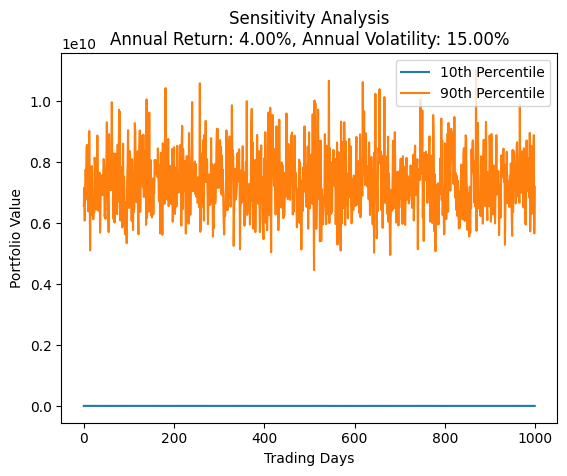

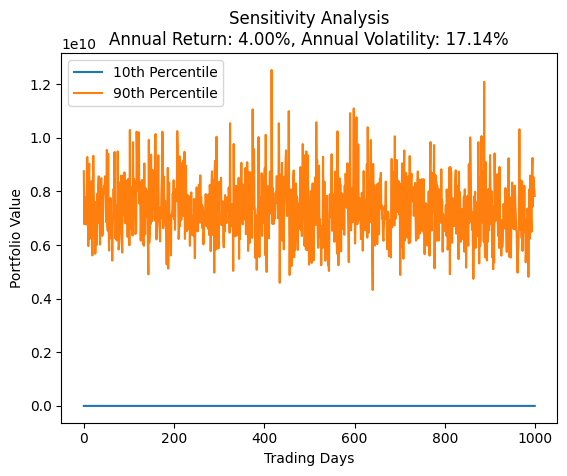

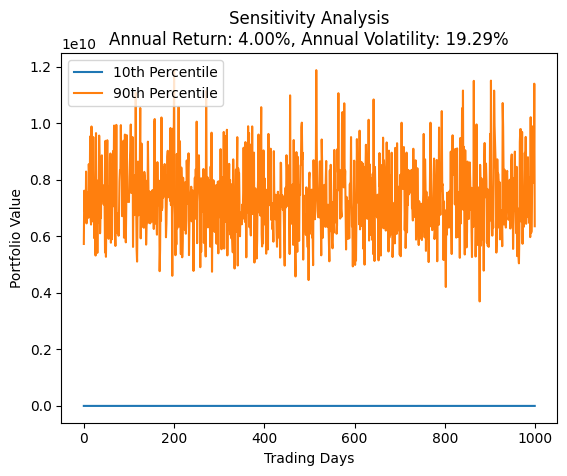

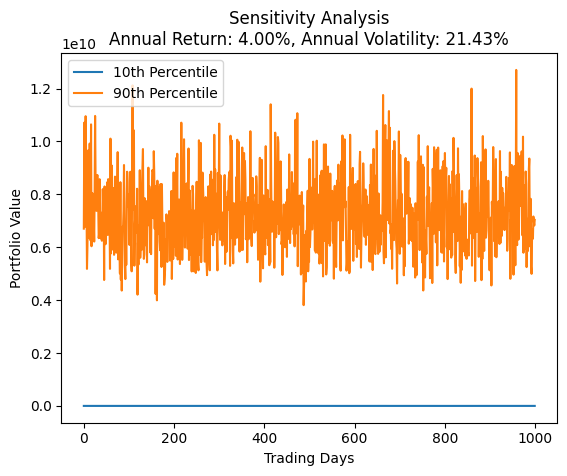

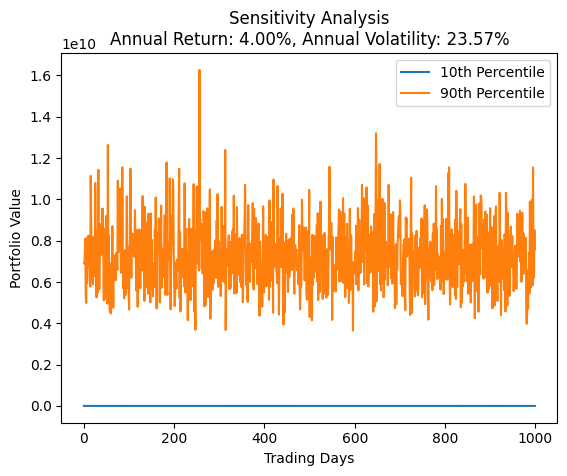

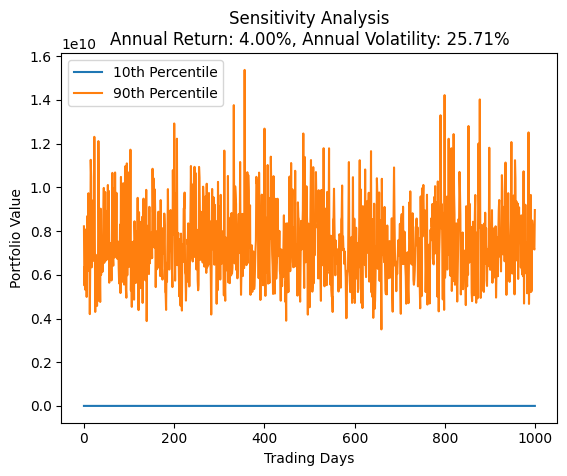

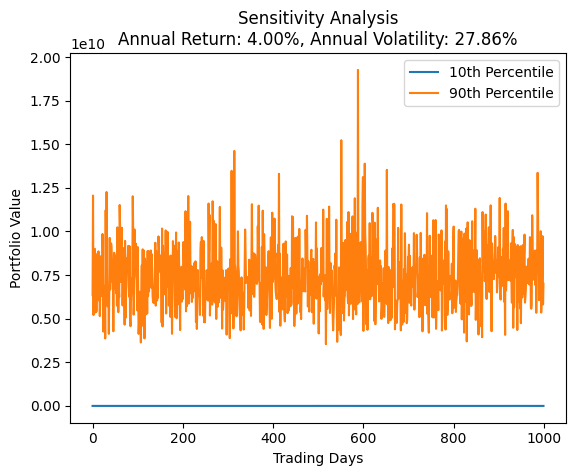

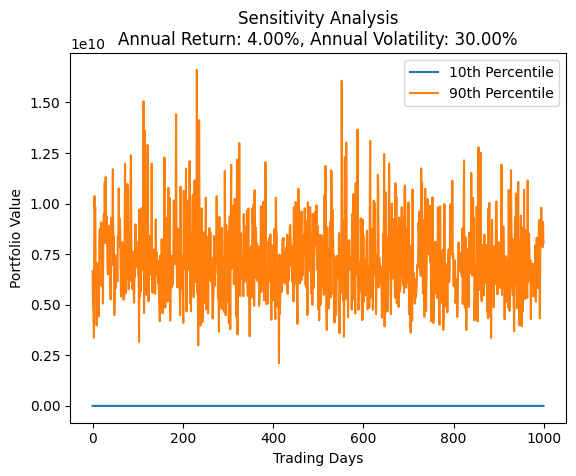

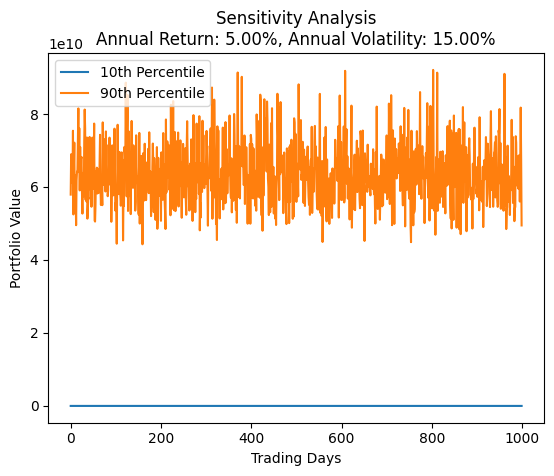

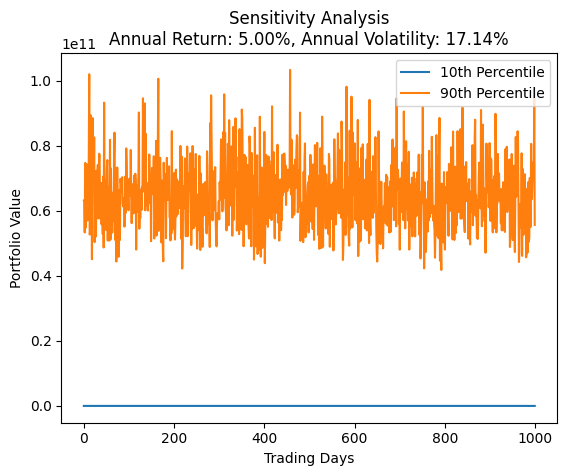

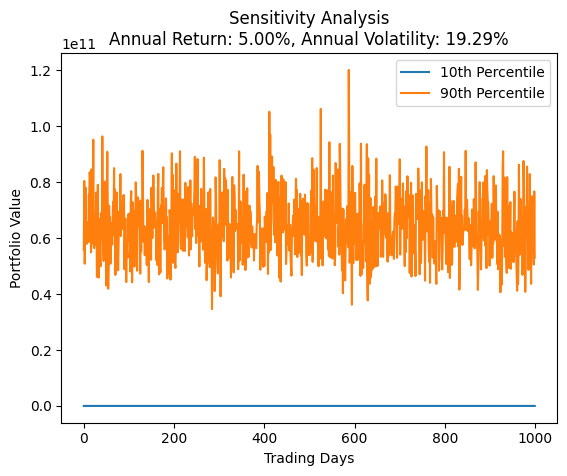

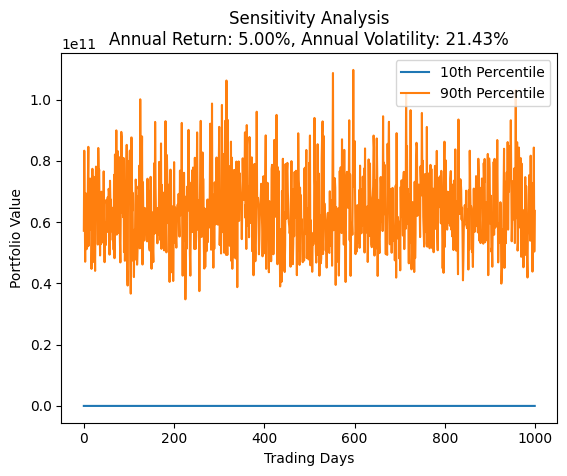

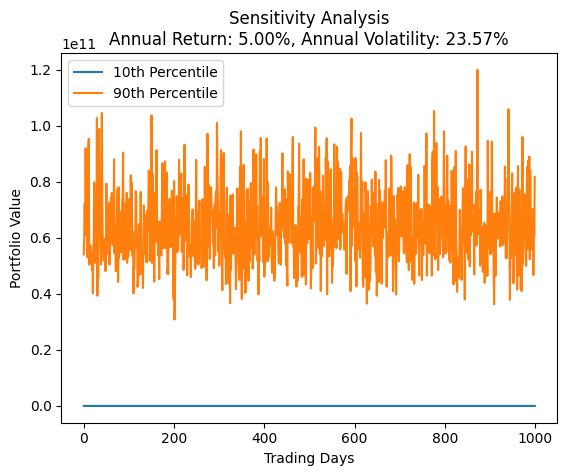

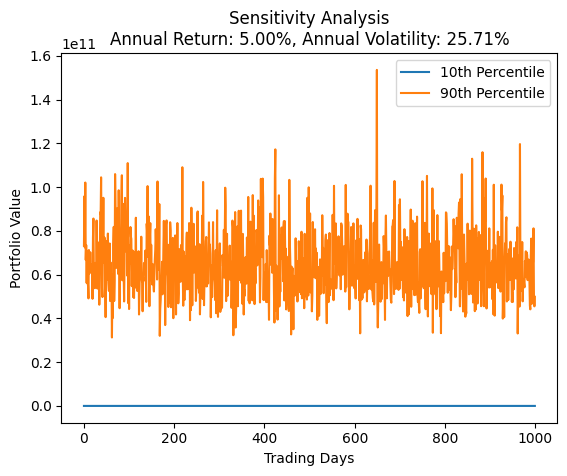

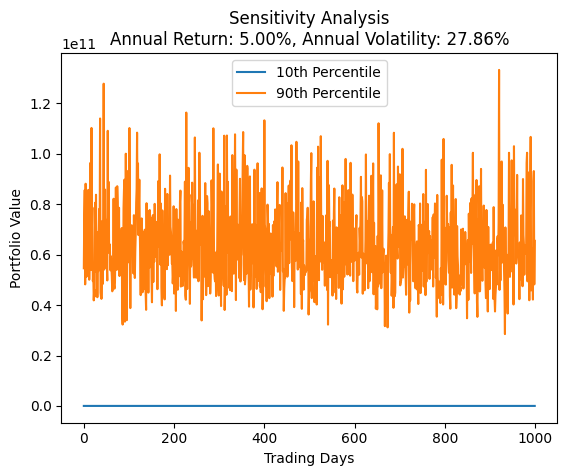

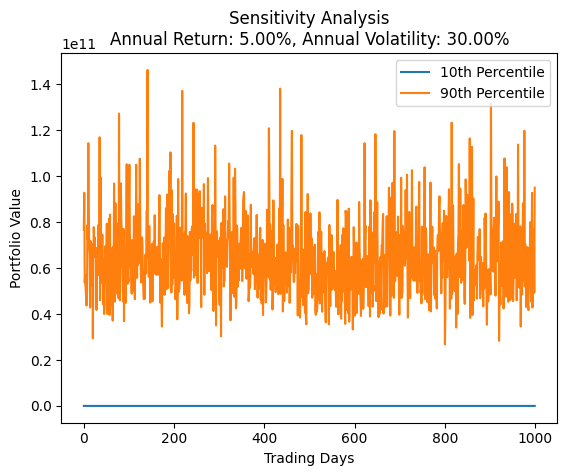

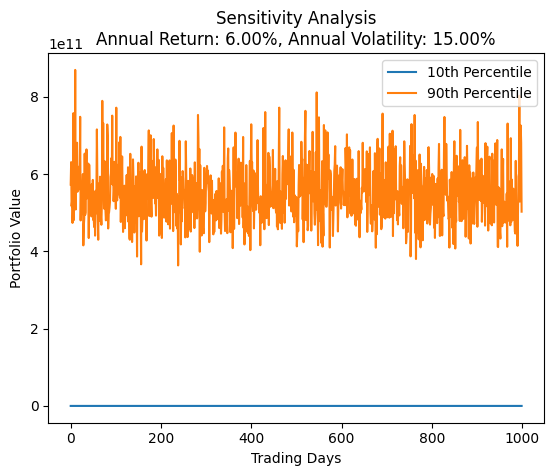

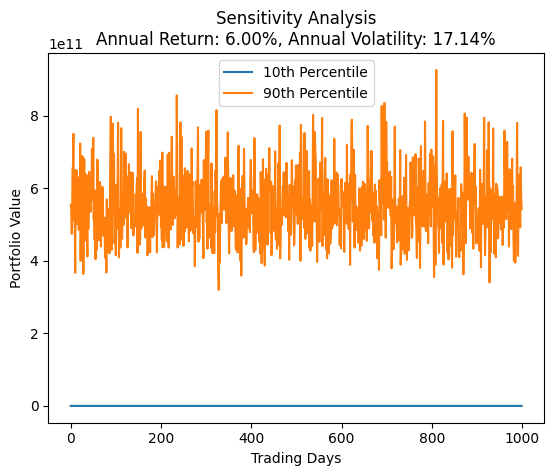

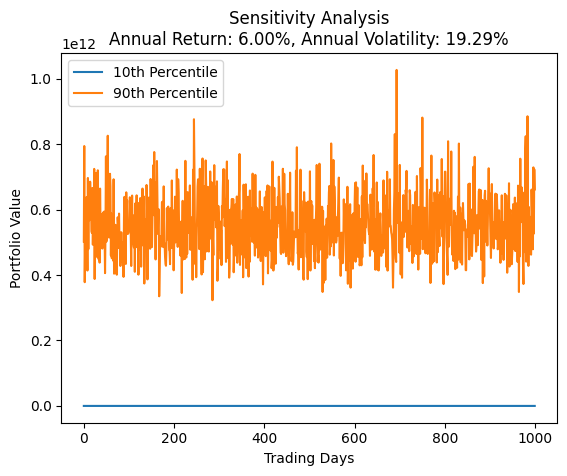

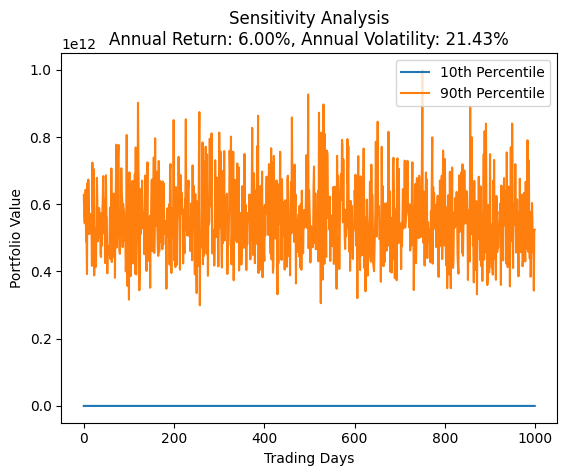

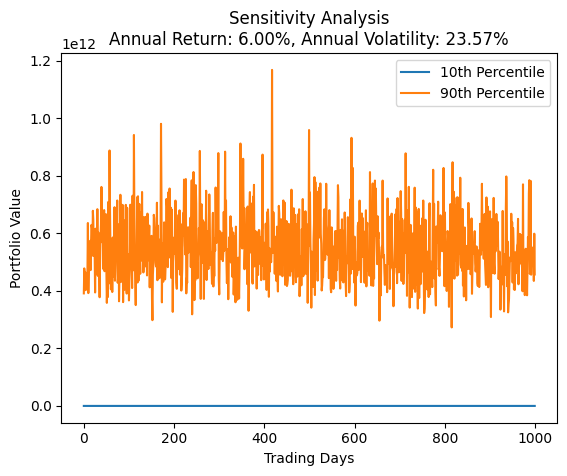

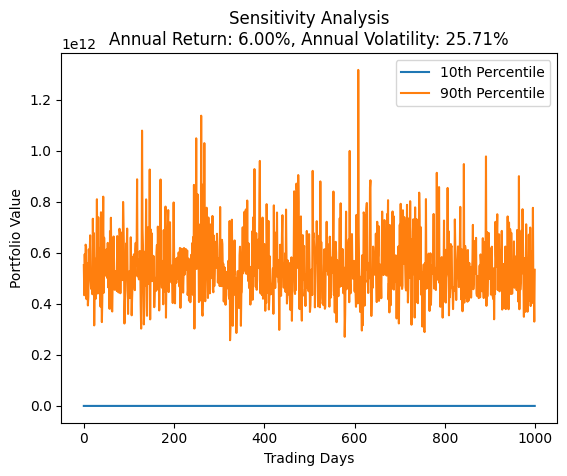

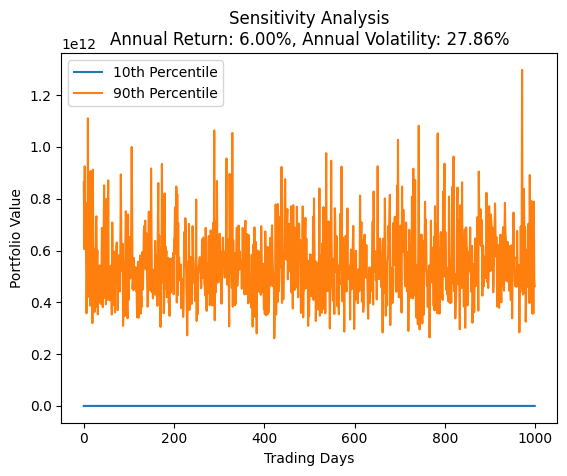

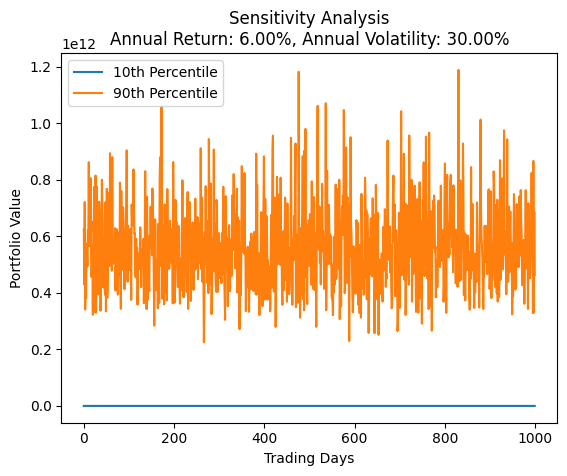

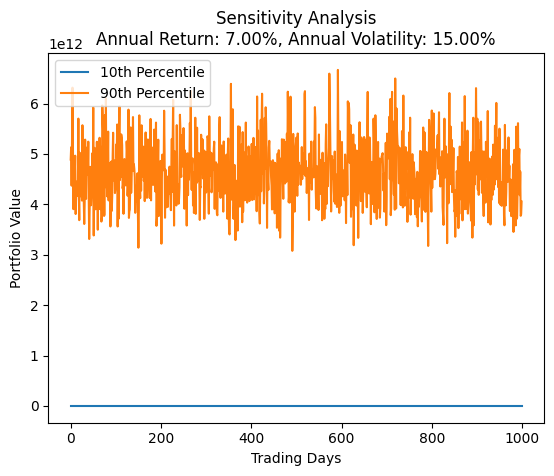

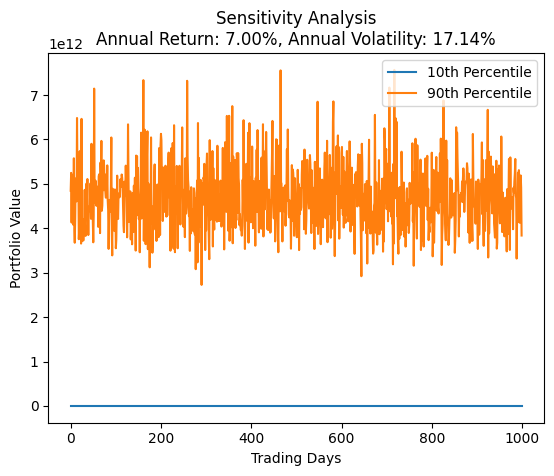

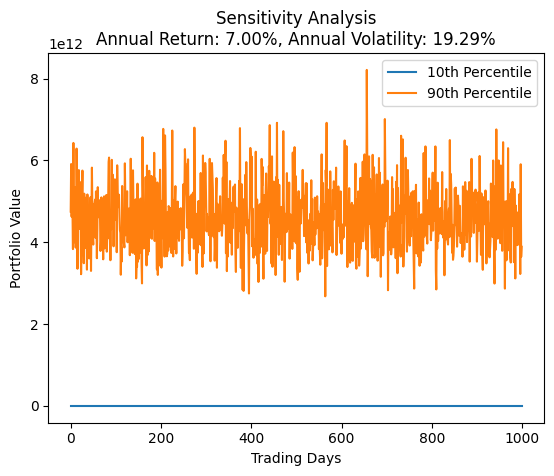

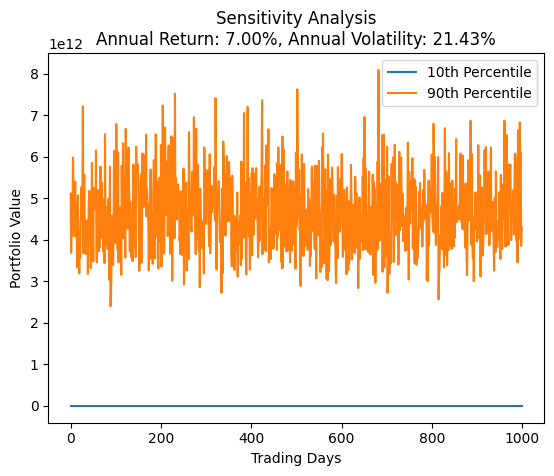

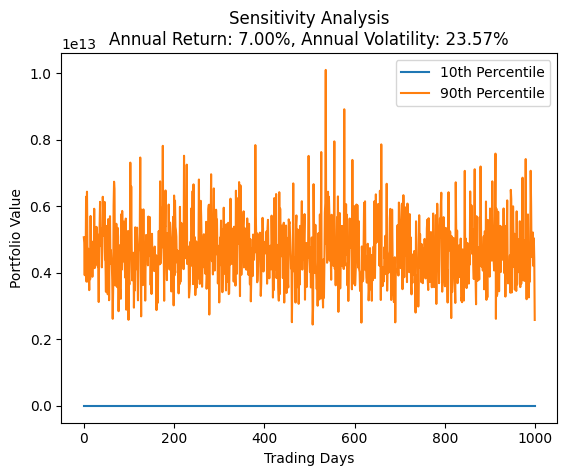

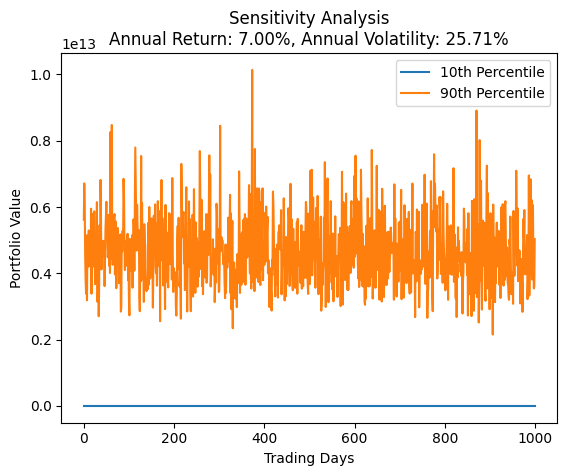

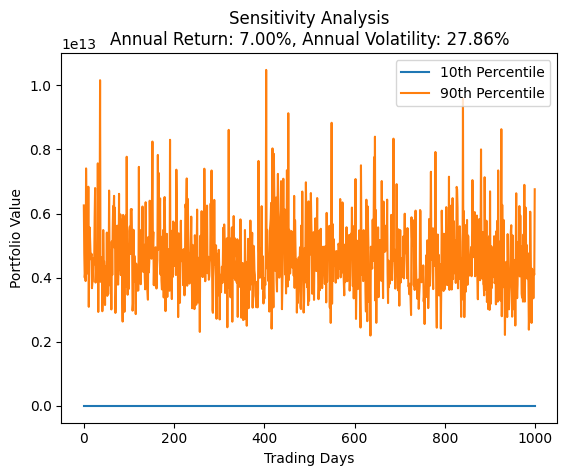

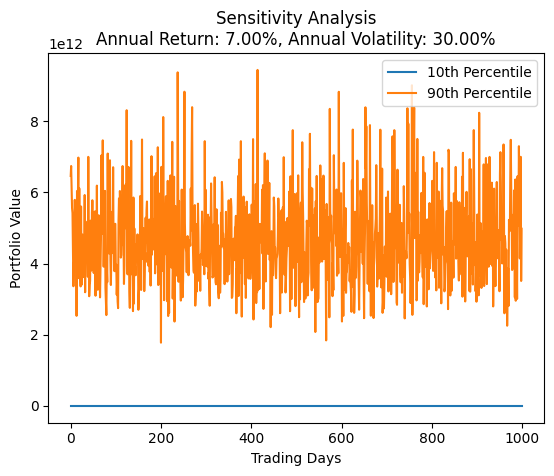

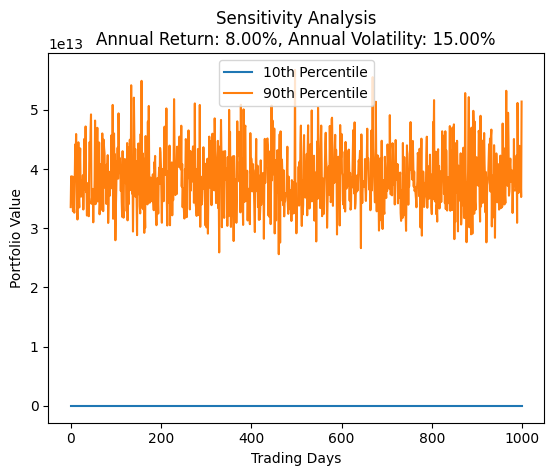

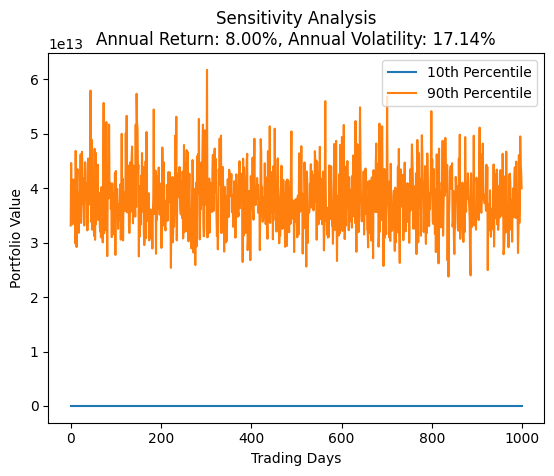

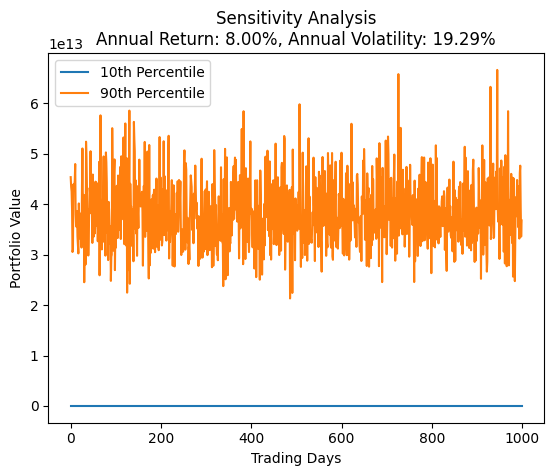

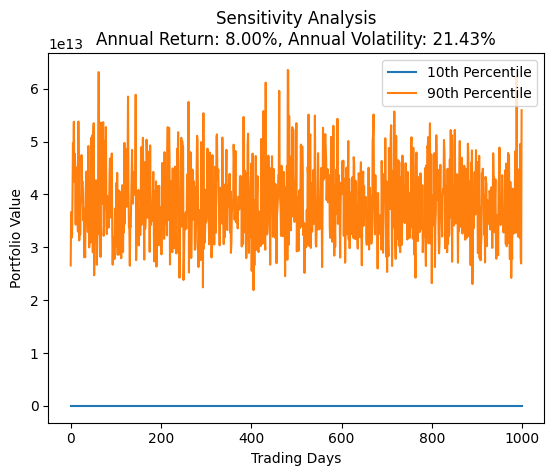

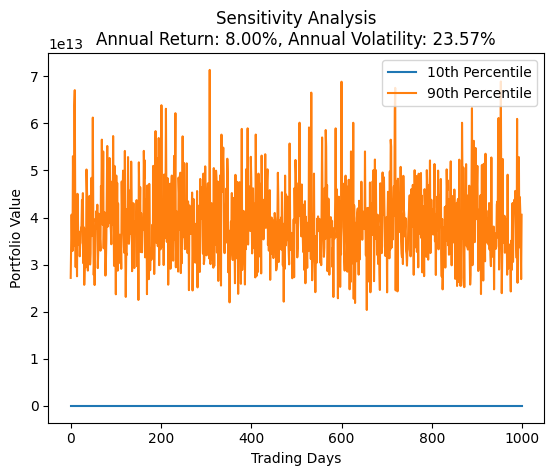

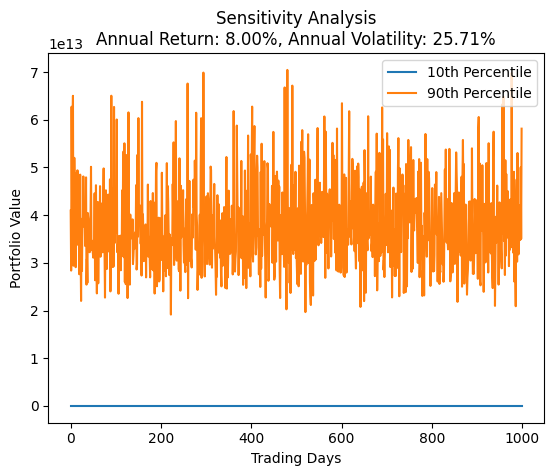

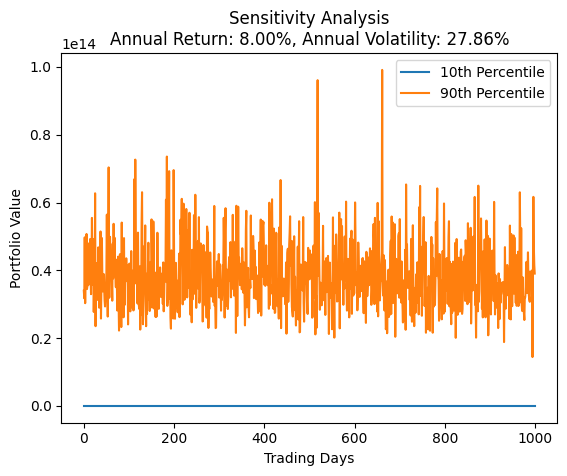

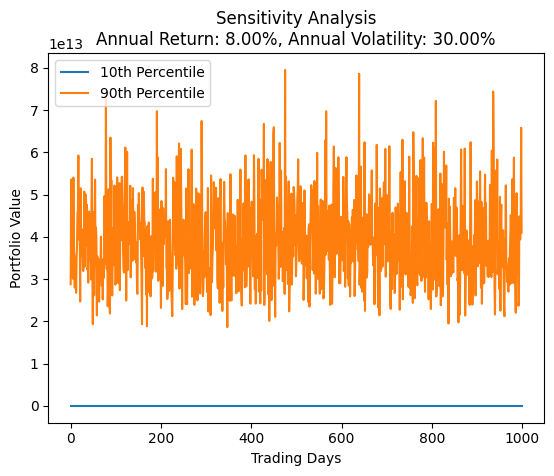

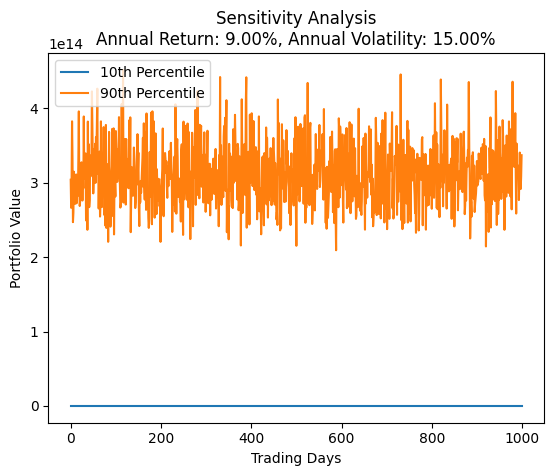

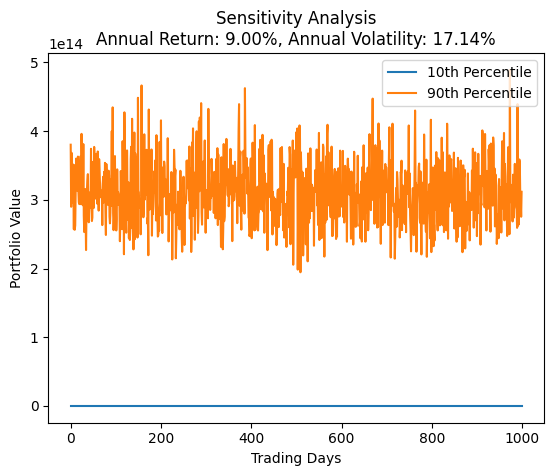

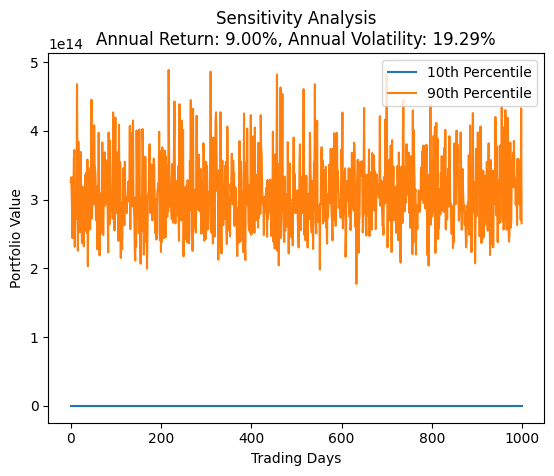

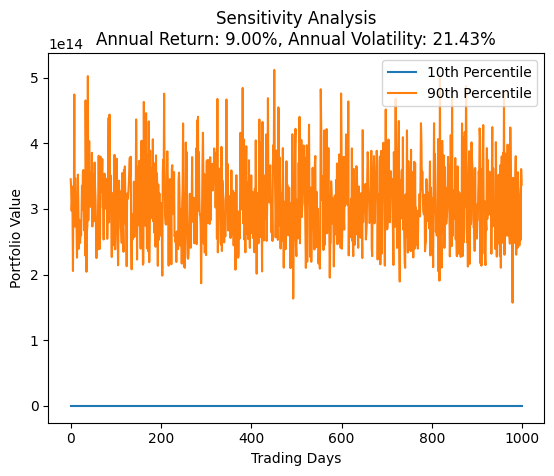

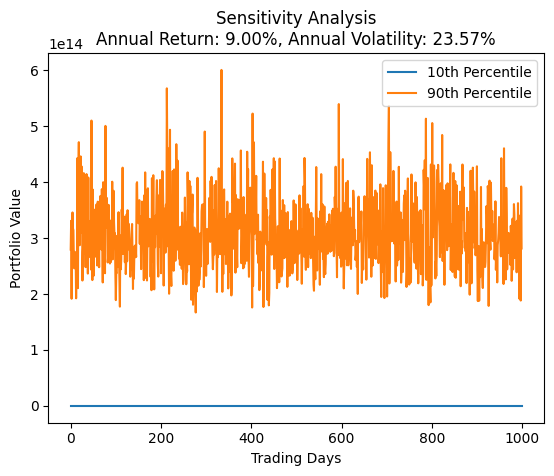

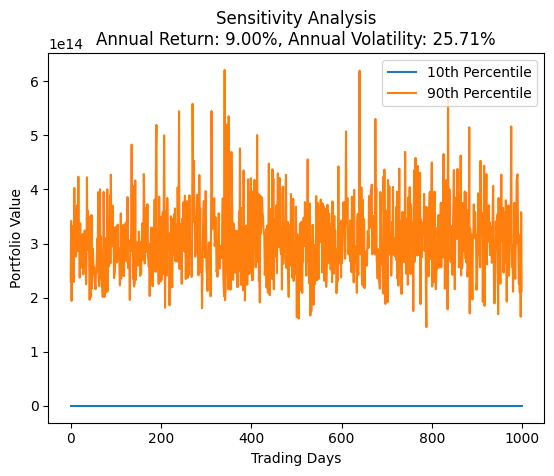

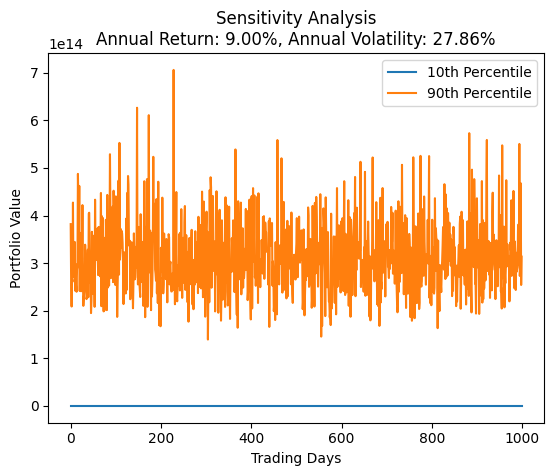

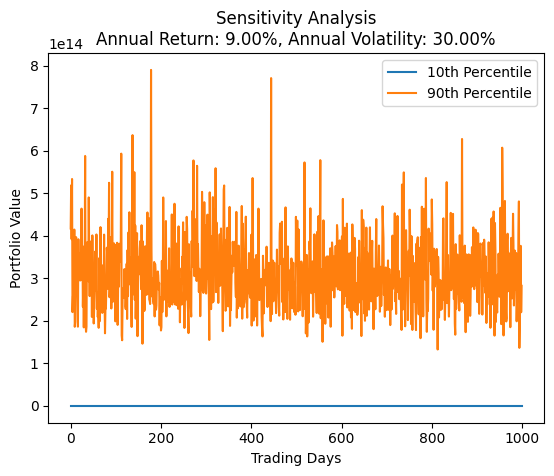

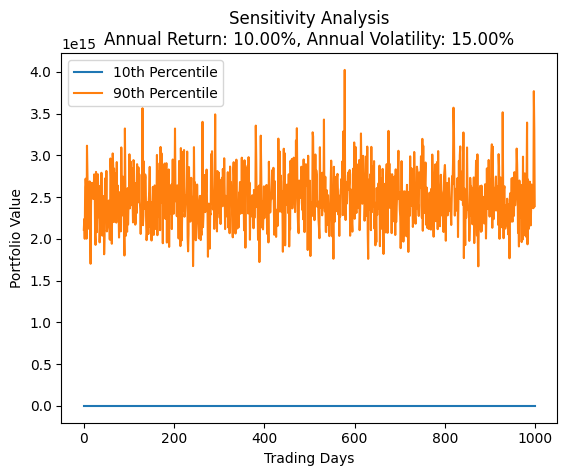

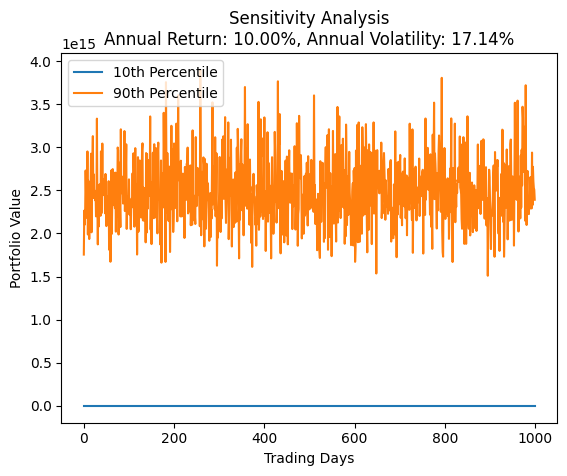

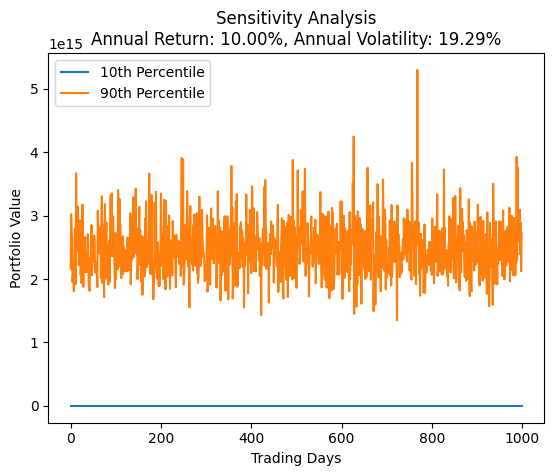

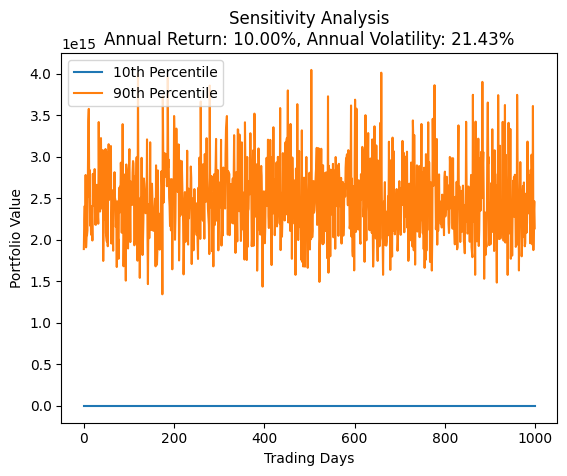

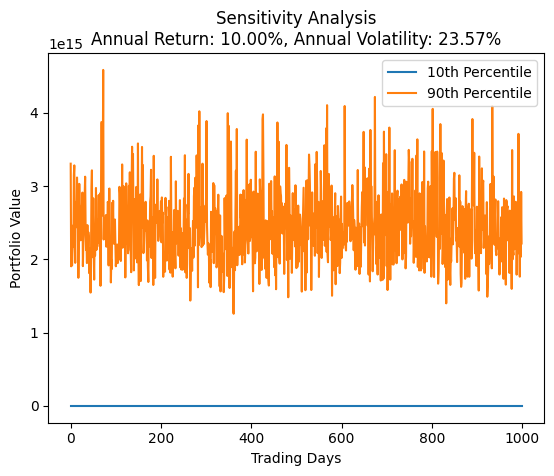

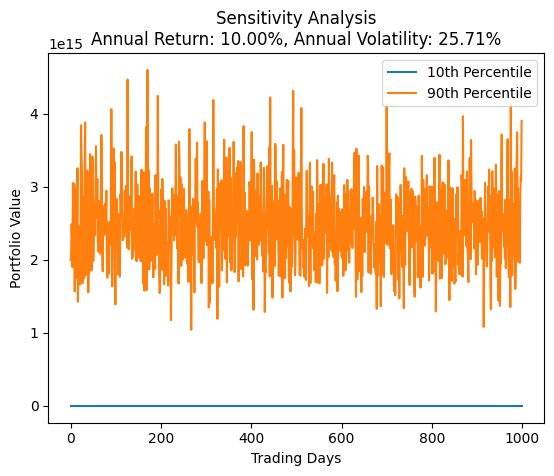

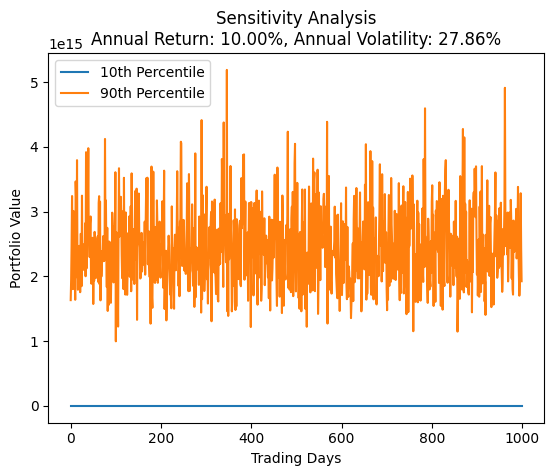

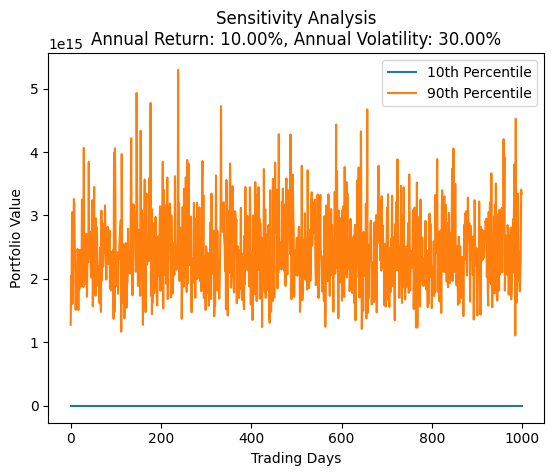

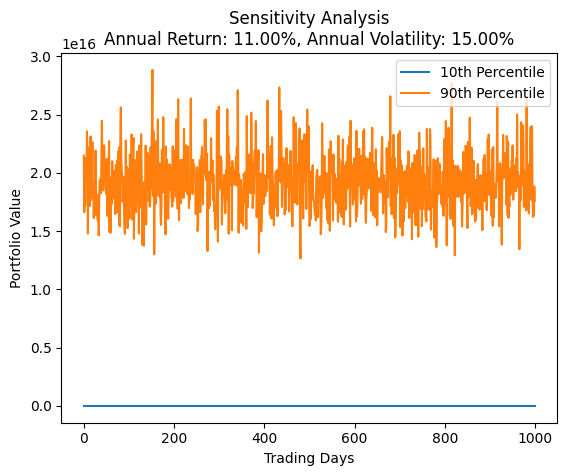

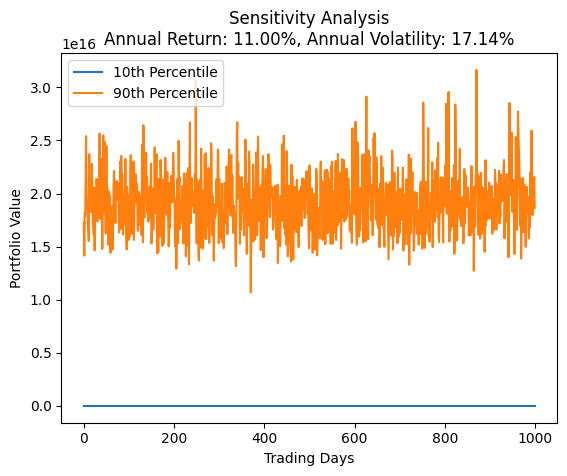

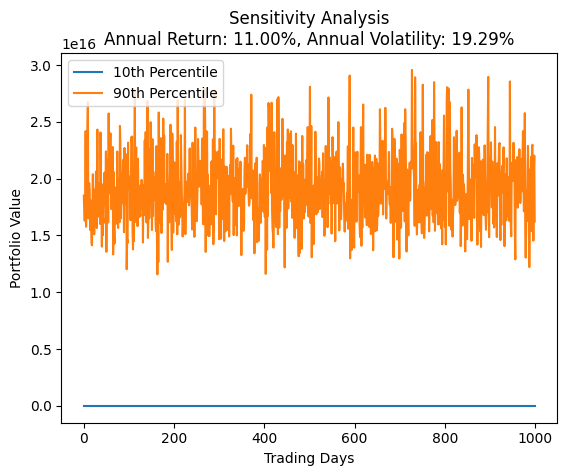

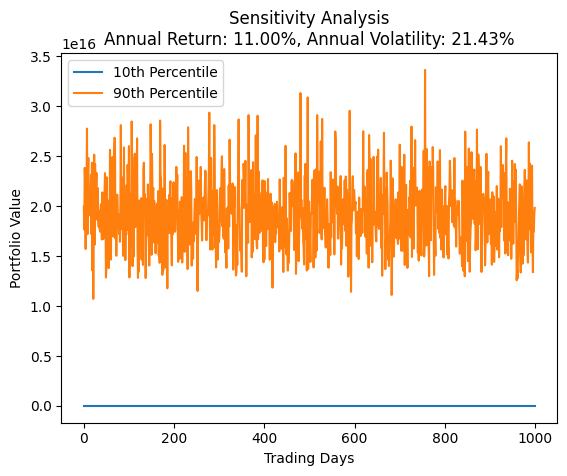

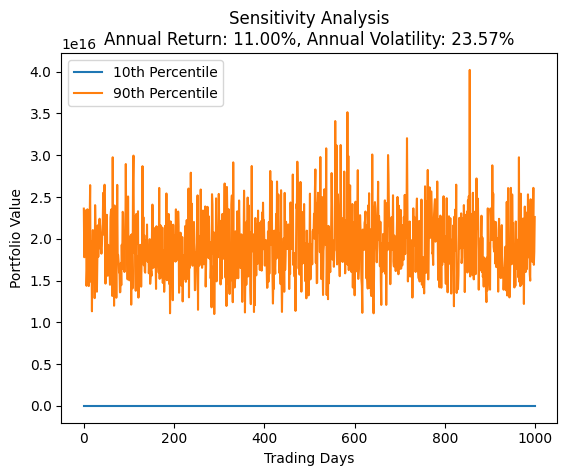

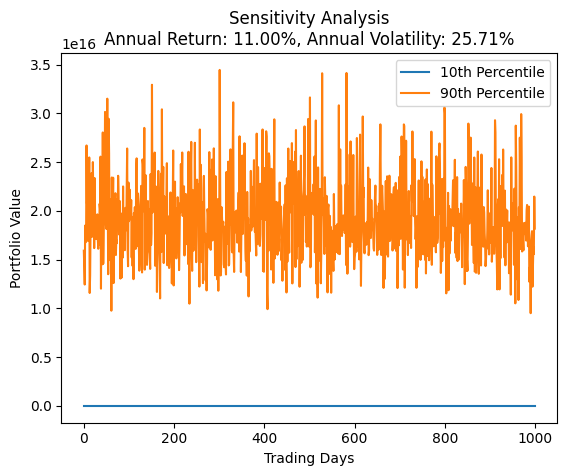

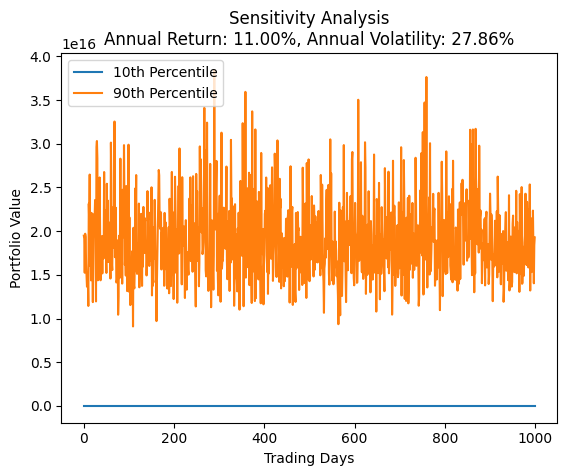

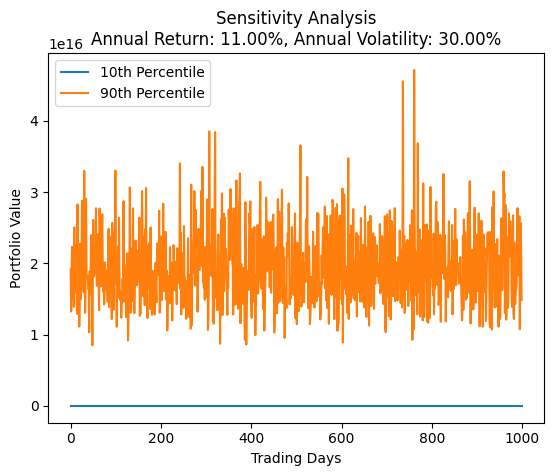

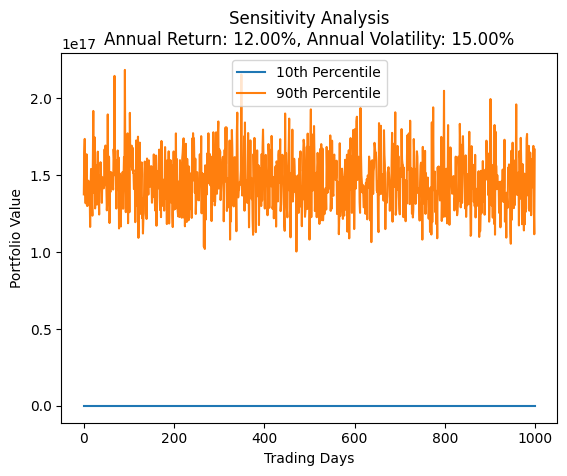

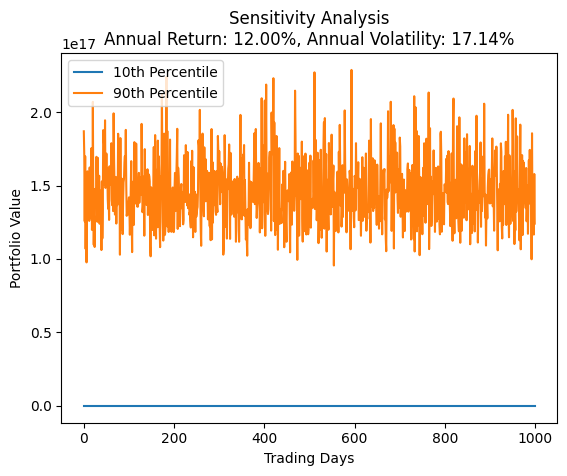

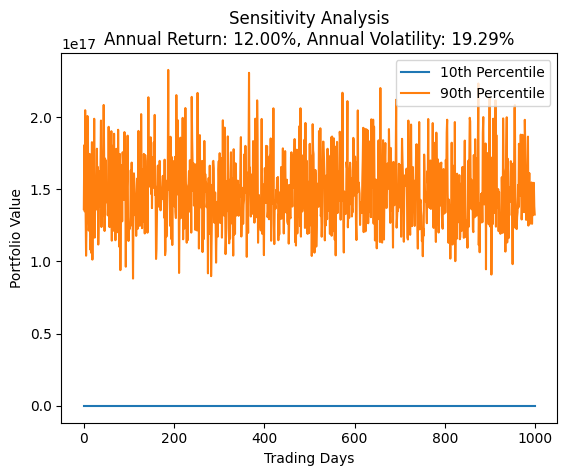

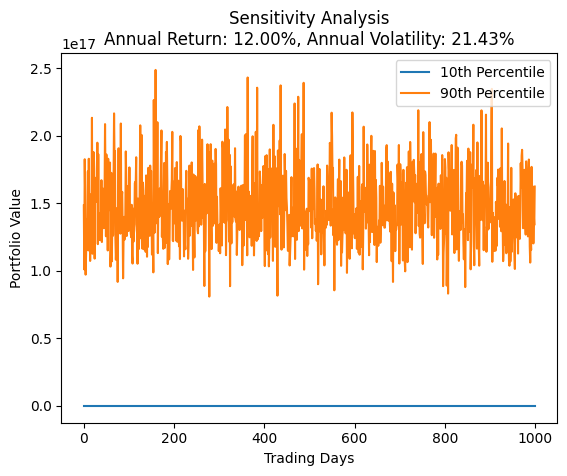

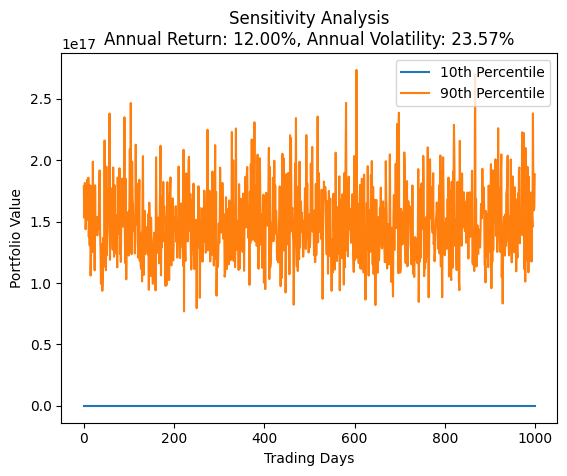

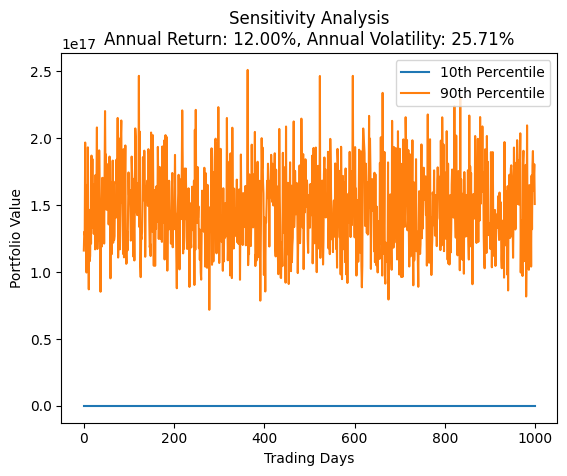

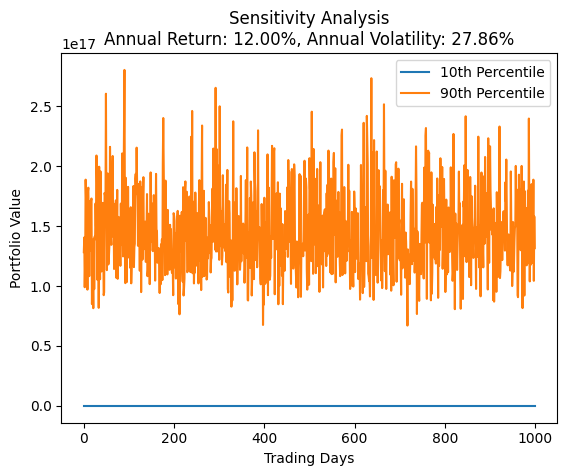

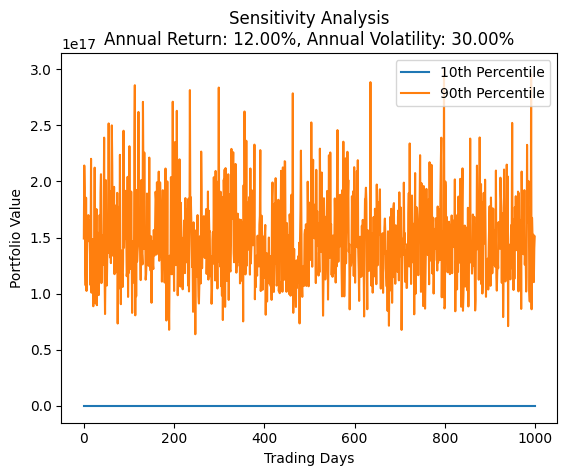

In [77]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define list of companies and download historical stock price data for a specific date range
companies = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'META']
start_date = '2020-01-01'  # Start date for data
end_date = '2023-04-04'  # End date for data
data = yf.download(companies, start=start_date, end=end_date, auto_adjust=True)['Close']

# Define parameters for sensitivity analysis
n_simulations = 1000  # Number of simulations
n_days = 252  # Number of trading days in a year
initial_investment = 1000000  # Initial investment amount
annual_return_range = np.linspace(0.04, 0.12, num=9)  # Range of annual return values
annual_volatility_range = np.linspace(0.15, 0.30, num=8)  # Range of annual volatility values

# Function to perform sensitivity analysis
def perform_sensitivity_analysis(annual_return, annual_volatility):
    portfolio_values = []
    for i in range(n_simulations):
        returns = np.random.normal(annual_return, annual_volatility / np.sqrt(n_days), n_days) + 1
        portfolio_value = initial_investment * np.cumprod(returns)
        portfolio_values.append(portfolio_value)
    return np.array(portfolio_values)

# Perform sensitivity analysis for different values of annual return and annual volatility
for annual_return in annual_return_range:
    for annual_volatility in annual_volatility_range:
        portfolio_values = perform_sensitivity_analysis(annual_return, annual_volatility)
        plt.plot(np.percentile(portfolio_values, 10, axis=1), label='10th Percentile')
        plt.plot(np.percentile(portfolio_values, 90, axis=1), label='90th Percentile')
        plt.xlabel('Trading Days')
        plt.ylabel('Portfolio Value')
        plt.title(f'Sensitivity Analysis\nAnnual Return: {annual_return:.2%}, Annual Volatility: {annual_volatility:.2%}')
        plt.legend()
        plt.show()


This code uses the np.linspace() function to define a range of values for annual return and annual volatility, and performs sensitivity analysis by iterating over these values and generating Monte Carlo simulations for each combination. The resulting portfolio values for the 10th and 90th percentiles are plotted for each combination of annual return and annual volatility, allowing for visualization of the sensitivity of the portfolio to changes in these parameters.

### Reverse Stress Testing

[*********************100%***********************]  5 of 5 completed


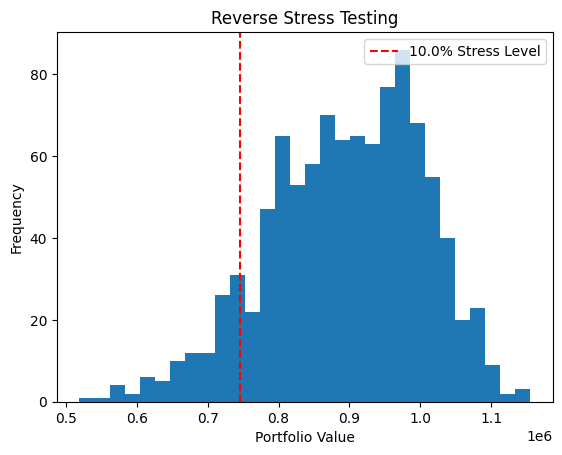

In [81]:
import yfinance as yf
import numpy as np

# Define list of companies and download historical stock price data for a specific date range
companies = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'META']
start_date = '2020-01-01'  # Start date for data
end_date = '2023-04-03'  # End date for data
data = yf.download(companies, start=start_date, end=end_date, auto_adjust=True)['Close']

# Define parameters for reverse stress testing
n_simulations = 1000  # Number of simulations
n_days = 252  # Number of trading days in a year
initial_investment = 1000000  # Initial investment amount
stress_level = 0.1  # Stress level as a percentage of initial investment

# Function to perform reverse stress testing
def perform_reverse_stress_testing(stress_level):
    portfolio_values = []
    for i in range(n_simulations):
        returns = np.random.normal(0, 0.2 / np.sqrt(n_days), n_days) + 1
        portfolio_value = initial_investment * np.cumprod(returns)
        portfolio_values.append(portfolio_value)
    stress_test_results = np.percentile(portfolio_values, stress_level * 100, axis=1)
    return stress_test_results

# Perform reverse stress testing for the given stress level
stress_test_results = perform_reverse_stress_testing(stress_level)

# Plot the distribution of stress test results
plt.hist(stress_test_results, bins=30)
plt.axvline(np.percentile(stress_test_results, stress_level * 100), color='red', linestyle='dashed',
            label=f'{stress_level * 100:.1f}% Stress Level')
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')
plt.title('Reverse Stress Testing')
plt.legend()
plt.show()


This code uses the np.random.normal() function to generate random returns with mean 0 and standard deviation of 0.2 divided by the square root of the number of trading days in a year. The resulting portfolio values for each simulation are stored in an array, and the stress test results are calculated as the specified percentile (e.g., 10th percentile for a stress level of 0.1). The distribution of stress test results is then plotted using a histogram, with a vertical dashed line indicating the stress test result at the specified stress level.

-

The results of the reverse stress testing code would be a histogram plot showing the distribution of portfolio values obtained from multiple simulations. Each simulation represents a hypothetical scenario of the portfolio's performance over a specified date range, taking into account random returns generated with mean 0 and a standard deviation of 0.2 divided by the square root of the number of trading days in a year.

The stress test results are calculated as the specified percentile (e.g., 10th percentile for a stress level of 0.1), which represents the portfolio value that would be exceeded by only a certain percentage of simulations under the reverse stress testing scenario. This percentile value is plotted on the histogram as a vertical dashed line, indicating the stress test result at the specified stress level.

The histogram plot provides a visual representation of the distribution of portfolio values under different hypothetical scenarios, allowing for an assessment of the portfolio's vulnerability to extreme events or stress conditions. It can help in identifying potential weaknesses in the portfolio and assessing the impact of adverse scenarios on the portfolio's value.






### Machine Learning Techniques

In [25]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Define the tickers of the companies you want to include in your portfolio
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']

# Retrieve the historical stock data from Yahoo Finance
data = yf.download(tickers, start='2014-01-01', end='2023-04-19')


[*********************100%***********************]  4 of 4 completed


In [26]:
# Preprocess the data
data = data['Adj Close']
returns = data.pct_change()
returns = returns.dropna()

# Calculate the daily returns for each stock
portfolio_returns = returns.mean(axis=1)


In [27]:
# Define the stress test parameters
stress_factor = 0.1
horizon = 30

# Split the data into training and testing sets
X = portfolio_returns.iloc[:-horizon]
Y = portfolio_returns.shift(-horizon).iloc[:-horizon]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Train and evaluate the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train.values.reshape(-1, 1), Y_train)
lr_predictions = lr_model.predict(X_test.values.reshape(-1, 1))
lr_mae = mean_absolute_error(Y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(Y_test, lr_predictions))

print('Linear Regression:')
print('MAE:', lr_mae)
print('RMSE:', lr_rmse)

# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train.values.reshape(-1, 1), Y_train)
rf_predictions = rf_model.predict(X_test.values.reshape(-1, 1))
rf_mae = mean_absolute_error(Y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(Y_test, rf_predictions))

print('Random Forest:')
print('MAE:', rf_mae)
print('RMSE:', rf_rmse)

# Train and evaluate the Support Vector Regression model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train.values.reshape(-1, 1), Y_train)
svr_predictions = svr_model.predict(X_test.values.reshape(-1, 1))
svr_mae = mean_absolute_error(Y_test, svr_predictions)
svr_rmse = np.sqrt(mean_squared_error(Y_test, svr_predictions))

print('Support Vector Regression:')
print('MAE:', svr_mae)
print('RMSE:', svr_rmse)

Linear Regression:
MAE: 0.014653298351441342
RMSE: 0.019239480926552335
Random Forest:
MAE: 0.016541534051944303
RMSE: 0.021584740636887898
Support Vector Regression:
MAE: 0.015048602905786216
RMSE: 0.019549335396658738


Finally, you can use the trained models to perform stress testing by predicting the portfolio returns under different stress scenarios.

In [28]:
# Generate stress test data
stress_test_data = np.array([[portfolio_returns.iloc[-1] * (1 + stress_factor)],
                             [portfolio_returns.iloc[-1] * (1 - stress_factor)]])

# Predict the new returns using the Linear Regression model
lr_stress_predictions = lr_model.predict(stress_test_data.reshape(-1, 1))

# Predict the new returns using the Random Forest model
rf_stress_predictions = rf_model.predict(stress_test_data.reshape(-1, 1))

# Predict the new returns using the Support Vector Regression model
svr_stress_predictions = svr_model.predict(stress_test_data.reshape(-1, 1))

print('Stress Test Results:')
print('Linear Regression:')
print('Stress Test Predictions:', lr_stress_predictions)
print('Random Forest:')
print('Stress Test Predictions:', rf_stress_predictions)
print('Support Vector Regression:')
print('Stress Test Predictions:', svr_stress_predictions)


Stress Test Results:
Linear Regression:
Stress Test Predictions: [0.00129605 0.00128358]
Random Forest:
Stress Test Predictions: [ 0.01370647 -0.00010147]
Support Vector Regression:
Stress Test Predictions: [-0.00343842 -0.00343357]


In this example, we generated stress test data by assuming a stress factor of 10% and generating two scenarios: one where the portfolio returns increase by 10%, and one where they decrease by 10%. We then used the trained models to predict the portfolio returns under these stress scenarios.

We can also create a loop to iterate through a range of stress factors and perform stress testing for each factor.

In [29]:
# Define a range of stress factors to test
stress_factors = [0.05, 0.1, 0.15]

# Iterate through the stress factors and perform stress testing
for factor in stress_factors:
    # Generate stress test data
    stress_test_data = np.array([[portfolio_returns.iloc[-1] * (1 + factor)],
                                 [portfolio_returns.iloc[-1] * (1 - factor)]])

    # Predict the new returns using the Linear Regression model
    lr_stress_predictions = lr_model.predict(stress_test_data.reshape(-1, 1))

    # Predict the new returns using the Random Forest model
    rf_stress_predictions = rf_model.predict(stress_test_data.reshape(-1, 1))

    # Predict the new returns using the Support Vector Regression model
    svr_stress_predictions = svr_model.predict(stress_test_data.reshape(-1, 1))

    print('Stress Test Results for factor', factor)
    print('Linear Regression:')
    print('Stress Test Predictions:', lr_stress_predictions)
    print('Random Forest:')
    print('Stress Test Predictions:', rf_stress_predictions)
    print('Support Vector Regression:')
    print('Stress Test Predictions:', svr_stress_predictions)


Stress Test Results for factor 0.05
Linear Regression:
Stress Test Predictions: [0.00129294 0.0012867 ]
Random Forest:
Stress Test Predictions: [0.00256131 0.00789324]
Support Vector Regression:
Stress Test Predictions: [-0.00343721 -0.00343478]
Stress Test Results for factor 0.1
Linear Regression:
Stress Test Predictions: [0.00129605 0.00128358]
Random Forest:
Stress Test Predictions: [ 0.01370647 -0.00010147]
Support Vector Regression:
Stress Test Predictions: [-0.00343842 -0.00343357]
Stress Test Results for factor 0.15
Linear Regression:
Stress Test Predictions: [0.00129917 0.00128046]
Random Forest:
Stress Test Predictions: [-0.01542348  0.00700052]
Support Vector Regression:
Stress Test Predictions: [-0.00343963 -0.00343235]


In this updated example, we defined a list of stress factors (0.05, 0.1, and 0.15) and looped through them to perform stress testing for each factor. For each stress factor, we generated two scenarios: one where the portfolio returns increase by the factor and one where they decrease by the factor. We then used the trained machine learning models to predict the portfolio returns under each stress scenario and printed the results for each model.

We can also use models like Long Short-Term Memory (LSTM) for stress testing

First, we generate some data and save in

In [48]:
import pandas as pd
import numpy as np

# Define companies and stress factors
companies = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'TSLA']
stress_factors = ['GDP', 'Interest Rates', 'Inflation', 'Unemployment Rate', 'Stock Market']

# Generate random financial data
data = pd.DataFrame(index=pd.date_range('2015-01-01', '2023-03-03', freq='D'))
for company in companies:
    data[company] = np.random.rand(len(data)).cumsum()

for stress_factor in stress_factors:
    data[stress_factor] = np.random.rand(len(data)) * 100

# Save data to CSV
data.to_csv('portfolio_data1.csv', index=True, index_label='Date')


This code generates a random financial data for a portfolio of 5 companies, with columns for each company's stock prices and columns for each stress factor. The data is saved to a CSV file named portfolio_data.csv, which can then be used as input for the stress testing code. Please note that this is a synthetic example and the generated financial data is purely random and not based on any real-world data. In practice, you would need to obtain actual financial data from a reliable source such as Yahoo Finance or other financial data providers for accurate stress testing.

Or we can use data from Yahoo Finance

In [59]:
import yfinance as yf
import pandas as pd

# Define the list of companies in the portfolio
companies = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'TSLA']

# Define stress factors
stress_factors = ['GDP', 'Interest Rates', 'Inflation', 'Unemployment Rate', 'Stock Market']

# Download financial data for each company
data = yf.download(companies, start='2015-01-01', end='2023-03-03')['Close']

# Download stress factors data from external source (e.g. economic data provider)
# Replace this step with actual code to fetch data from the desired source

# Merge company data with stress factors data
for factor in stress_factors:
    # Generate random values for stress factors for each company
    stress_data = pd.Series(np.random.rand(len(data)), name=factor, index=data.index)
    data = pd.concat([data, stress_data], axis=1)

# Rename columns for stress factors
data.rename(columns={factor: f'{factor}' for factor in stress_factors}, inplace=True)

# Save data to CSV file
data.to_csv('portfolio_data.csv')
print('portfolio_data.csv file has been generated successfully.')


[*********************100%***********************]  5 of 5 completed
portfolio_data.csv file has been generated successfully.


In [60]:
data.head()

AAPL     AMZN      GOOGL       MSFT       TSLA       GDP  \
Date                                                                        
2015-01-02  27.332500  15.4260  26.477501  46.759998  14.620667  0.703388   
2015-01-05  26.562500  15.1095  25.973000  46.330002  14.006000  0.498821   
2015-01-06  26.565001  14.7645  25.332001  45.650002  14.085333  0.890255   
2015-01-07  26.937500  14.9210  25.257500  46.230000  14.063333  0.757280   
2015-01-08  27.972500  15.0230  25.345501  47.590000  14.041333  0.692384   

            Interest Rates  Inflation  Unemployment Rate  Stock Market  
Date                                                                    
2015-01-02        0.018906   0.894413           0.964285      0.707288  
2015-01-05        0.509964   0.100540           0.570874      0.729378  
2015-01-06        0.066916   0.321437           0.885590      0.809429  
2015-01-07        0.712548   0.903770           0.961886      0.427672  
2015-01-08        0.615399   0.705857           0.884748      0.499753

Use LSTM to this data

In [63]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load financial data for the portfolio
data = pd.read_csv('portfolio_data.csv') # Replace with your own financial data file

# Extract relevant columns for stress testing
companies = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'TSLA']
stress_factors = ['GDP', 'Interest Rates', 'Inflation', 'Unemployment Rate', 'Stock Market']
stress_test_data = data[companies + stress_factors]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stress_test_data.values)

# Prepare training data
seq_length = 12
X_train = []
y_train = []

for i in range(seq_length, len(scaled_data)):
    X_train.append(scaled_data[i-seq_length:i])
    y_train.append(scaled_data[i])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the training data to match LSTM input shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(scaled_data.shape[1]))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Prepare stress test data
stress_test_data = stress_test_data.iloc[-seq_length:, :]  # Select the last seq_length rows for stress testing
scaled_stress_test_data = scaler.transform(stress_test_data.values)
scaled_stress_test_data = np.reshape(scaled_stress_test_data, (1, seq_length, -1))

#stress_test_data = stress_test_data.iloc[-seq_length:, :]  # Select the last seq_length rows for stress testing
#scaled_stress_test_data = scaler.transform(stress_test_data.values.reshape(1, seq_length, -1))

# Make predictions for stress test data
lstm_stress_predictions = model.predict(scaled_stress_test_data)

# Inverse transform the predictions to get actual values
lstm_stress_predictions = scaler.inverse_transform(lstm_stress_predictions)

# Print the predicted stress test values for each stress factor
for i in range(len(stress_factors)):
    print(f'Predicted stress test value for {stress_factors[i]}: {lstm_stress_predictions[0][i]}')


Epoch 1/100
64/64 [==============================] - 6s 14ms/step - loss: 0.0712
Epoch 2/100
64/64 [==============================] - 1s 14ms/step - loss: 0.0447
Epoch 3/100
64/64 [==============================] - 1s 15ms/step - loss: 0.0441
Epoch 4/100
64/64 [==============================] - 1s 13ms/step - loss: 0.0436
Epoch 5/100
64/64 [==============================] - 1s 15ms/step - loss: 0.0432
Epoch 6/100
64/64 [==============================] - 1s 15ms/step - loss: 0.0431
Epoch 7/100
64/64 [==============================] - 1s 16ms/step - loss: 0.0430
Epoch 8/100
64/64 [==============================] - 1s 15ms/step - loss: 0.0429
Epoch 9/100
64/64 [==============================] - 1s 18ms/step - loss: 0.0429
Epoch 10/100
64/64 [==============================] - 2s 25ms/step - loss: 0.0427
Epoch 11/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0428
Epoch 12/100
64/64 [==============================] - 1s 15ms/step - loss: 0.0426
Epoch 13/100
64/64 [=====